In [121]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [122]:
pd.set_option('display.max_columns', None)

In [123]:
# pd.set_option('display.max_rows', None)

In [124]:
data = pd.read_csv('./files_for_lesson_and_activities/marketing_customer_analysis.csv')

In [125]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
data = data.drop(['customer'], axis =1)

In [79]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [80]:
def clean_cols(x):
    return x.lower().replace(' ', '_')
new_cols = list(map(clean_cols, data.columns))

In [81]:
# new_cols = list(map(lambda x: x.lower().replace(' ', '_'), data.columns))

In [82]:
new_cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [83]:
data.columns = new_cols

In [84]:
data.shape

(9134, 24)

In [85]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [86]:
data.describe(include = 'all')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,GU33167,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [88]:
data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [89]:
data['number_of_policies'] = data['number_of_policies'].astype('object')

In [90]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [91]:
data['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [178]:
data['effective_to_date'].nunique()

59

In [180]:
data['effective_to_date'][0].year

2011

In [181]:
data['effective_to_date_YEAR'] = list(map(lambda x: x.year, data['effective_to_date']))

In [182]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_date_YEAR
0,Washington,7.924260,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011
1,Arizona,8.850738,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,other,Personal Auto,personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011
2,Nevada,9.464008,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011
3,California,8.941920,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,other,Corporate Auto,corporate,Offer1,Call Center,529.881344,SUV,Medsize,2011
4,Washington,7.942253,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011


In [183]:
data['effective_to_date_YEAR'].value_counts()

2011    8767
Name: effective_to_date_YEAR, dtype: int64

In [184]:
data['effective_to_date_month'] = list(map(lambda x: x.month, data['effective_to_date']))

In [185]:
data['effective_to_date_month'].value_counts()

1    4701
2    4066
Name: effective_to_date_month, dtype: int64

In [186]:
data.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'effective_to_date_YEAR',
       'effective_to_date_month'],
      dtype='object')

In [187]:
data = data.drop(['effective_to_date_month', 'effective_to_date_YEAR', 'effective_to_date'], axis = 1)

In [188]:
data.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                object
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [94]:
data.isna().sum()/len(data)*100

state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [95]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [96]:
data['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [97]:
data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [98]:
data.select_dtypes(np.object).columns

<ipython-input-98-91241be93641>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.select_dtypes(np.object).columns


Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'number_of_policies',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [119]:
for cat_col in data.select_dtypes(np.object).columns:
    print("column name: ", cat_col)
    print(data[cat_col].value_counts())
    print('\n')
    



column name:  state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64


column name:  response
No     7826
Yes    1308
Name: response, dtype: int64


column name:  coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64


column name:  education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64


column name:  employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64


column name:  gender
F    4658
M    4476
Name: gender, dtype: int64


column name:  location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64


column name:  marital_status
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype:

<ipython-input-119-e23f0ca7a5a4>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for cat_col in data.select_dtypes(np.object).columns:


In [100]:
def clean_num_policies(x):
    if x > 3:
        return 'other'
    else:
        return x

In [101]:
data['number_of_policies'] = list(map(clean_num_policies, data['number_of_policies']))

In [102]:
data['policy_type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [106]:
# data = data[data['policy_type']!='Special Auto']
# data = data.reset_index(drop=True)

In [104]:
data.shape

(9134, 23)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_type', ylabel='count'>

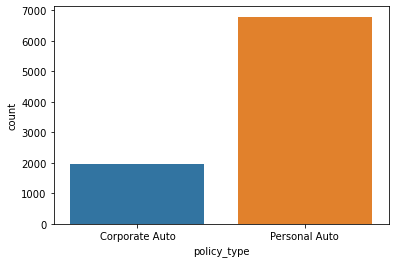

In [75]:
sns.countplot(data['policy_type'])

In [107]:
data['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [108]:
def clean_policy(x):
    if (x == 'Corporate L3') or (x == 'Corporate L1') or (x == 'Corporate L2'):
        return 'corporate'
    elif (x == 'Personal L3') or (x == 'Personal L1') or (x == 'Personal L2'):
        return 'personal'
    else:
        return 'special'

In [114]:
st = 'Corporate L3'
'Corporate' in st

True

In [115]:
def clean_policy(x):
    if 'Corporate' in x:
        return 'corporate'
    elif 'Personal' in x:
        return 'personal'
    else:
        return 'special'

In [118]:
data['policy'] = list(map(clean_policy, data['policy']))

In [117]:
# data[data['policy'].isin(['Corporate L3', 'Corporate L2', 'Corporate L1'])]

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,other,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
6,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,Suburban,Married,67,0,13,0,other,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,Urban,Single,101,0,68,0,other,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,California,5479.555081,Yes,Basic,Master,2011-01-13,Employed,M,56005,Suburban,Married,68,31,30,1,3,Corporate Auto,Corporate L2,Offer1,Branch,326.400000,Four-Door Car,Small
9121,California,4140.648654,No,Extended,College,2011-01-17,Unemployed,F,0,Suburban,Divorced,123,5,35,2,1,Corporate Auto,Corporate L3,Offer1,Branch,590.400000,SUV,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

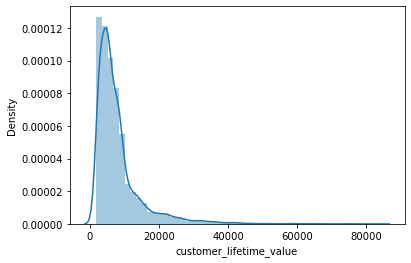

In [122]:
sns.distplot(data['customer_lifetime_value'])

In [123]:
data.select_dtypes(np.number).columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'total_claim_amount'],
      dtype='object')

customer_lifetime_value


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


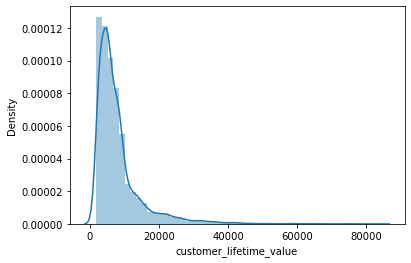

income


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


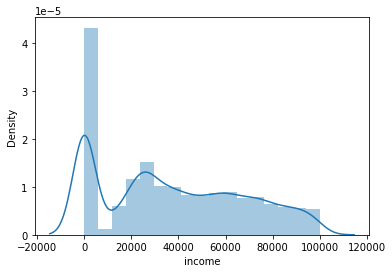

monthly_premium_auto


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


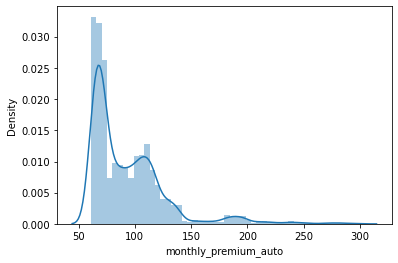

months_since_last_claim


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


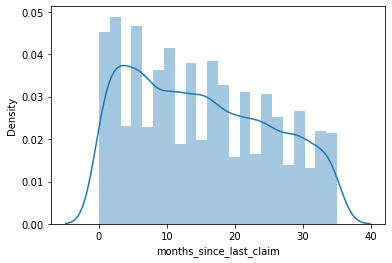

months_since_policy_inception


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


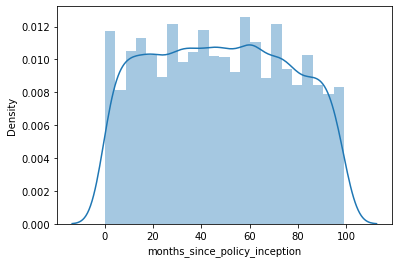

number_of_open_complaints


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


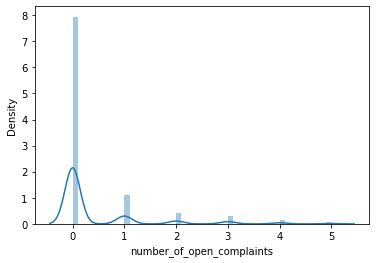

total_claim_amount


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


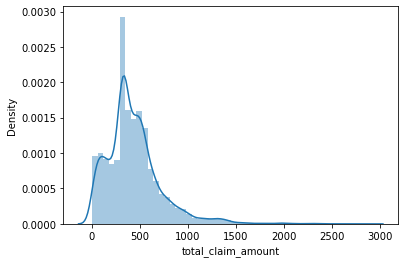

In [125]:
for num_col in data.select_dtypes(np.number).columns:
    print(num_col)
    sns.distplot(data[num_col])
    plt.show()

In [127]:
np.percentile(data['customer_lifetime_value'], 75)

8962.16704125

In [126]:
IQR = np.percentile(data['customer_lifetime_value'], 75)- np.percentile(data['customer_lifetime_value'], 25)

In [141]:
u_limit = np.percentile(data['customer_lifetime_value'], 75) + 3*IQR
l_limit = np.percentile(data['customer_lifetime_value'], 25) - 1.5*IQR

In [142]:
outliers = data[(data['customer_lifetime_value']>u_limit) | (data['customer_lifetime_value']<l_limit)]
outliers.shape

(367, 23)

In [143]:
data.shape

(9134, 23)

In [144]:
outliers.shape[0]/data.shape[0]*100

4.017954893803372

In [145]:
data = data[(data['customer_lifetime_value']<u_limit) & (data['customer_lifetime_value']>l_limit)]
data = data.reset_index(drop=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

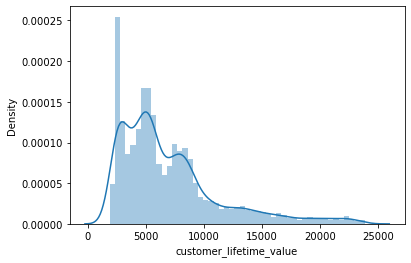

In [146]:
sns.distplot(data['customer_lifetime_value'])

In [147]:
def log_transform(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

In [158]:
np.log(10000)
# log of a large number is a small number 

9.210340371976184

In [149]:
temp = list(map(log_transform, data['customer_lifetime_value']))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

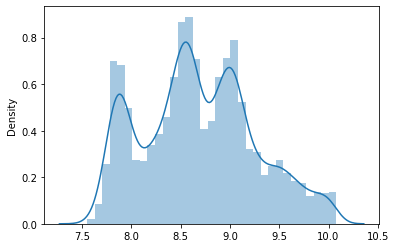

In [150]:
sns.distplot(temp)

In [151]:
def sq_rt_transform(x):
    if x<0:
        return 0
    else:
        return x**0.5 #math.sqrt(x)

In [152]:
temp = list(map(sq_rt_transform, data['customer_lifetime_value']))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

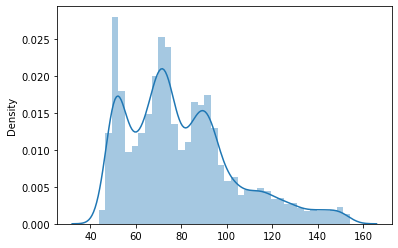

In [153]:
sns.distplot(temp)

In [159]:
def cube_rt_transform(x):
    if x<0:
        return 0
    else:
        return x**0.333 #math.sqrt(x)

In [160]:
temp = list(map(cube_rt_transform, data['customer_lifetime_value']))

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

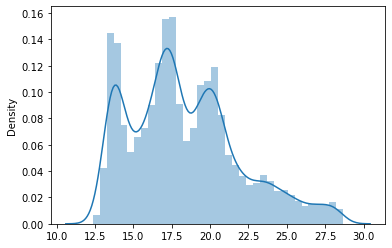

In [161]:
sns.distplot(temp)

In [162]:
data['customer_lifetime_value'] = list(map(log_transform, data['customer_lifetime_value']))

In [164]:
# sns.distplot(data['customer_lifetime_value'])

(array([2246.,  491., 1327.,  845.,  710.,  769.,  725.,  670.,  518.,
         466.]),
 array([    0. ,  9998.1, 19996.2, 29994.3, 39992.4, 49990.5, 59988.6,
        69986.7, 79984.8, 89982.9, 99981. ]),
 <BarContainer object of 10 artists>)

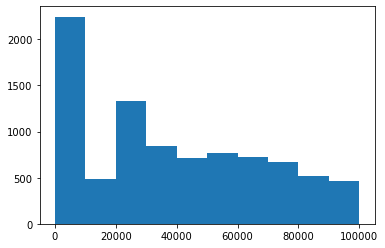

In [165]:
plt.hist(data['income'])

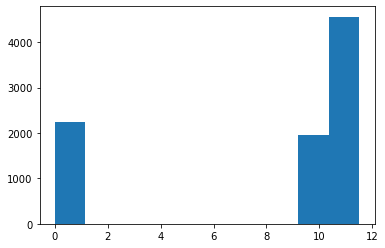

In [166]:
temp = list(map(log_transform, data['income']))
plt.hist(temp)
plt.show()

In [167]:
data[data['income']==0].shape

(2246, 23)

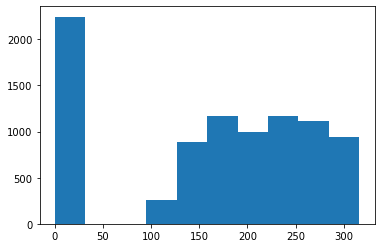

In [168]:
temp = list(map(sq_rt_transform, data['income']))
plt.hist(temp)
plt.show()

In [173]:
data['number_of_policies'].uniqueque()

array([1, 'other', 2, 3], dtype=object)

In [189]:
data.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,7.924260,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,corporate,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,8.850738,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,other,Personal Auto,personal,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,9.464008,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,personal,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,8.941920,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,other,Corporate Auto,corporate,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,7.942253,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,personal,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [190]:
data_correlation = data.corr()

In [191]:
data_correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,total_claim_amount
customer_lifetime_value,1.000000,0.043984,0.421066,0.015152,-0.009784,-0.043360,0.224298
income,0.043984,1.000000,-0.022957,-0.030260,-0.001411,0.002692,-0.361194
monthly_premium_auto,0.421066,-0.022957,1.000000,0.008300,0.010871,-0.012206,0.624933
months_since_last_claim,0.015152,-0.030260,0.008300,1.000000,-0.044841,0.005184,0.007136
months_since_policy_inception,-0.009784,-0.001411,0.010871,-0.044841,1.000000,-0.001467,-0.004062
number_of_open_complaints,-0.043360,0.002692,-0.012206,0.005184,-0.001467,1.000000,-0.012449
total_claim_amount,0.224298,-0.361194,0.624933,0.007136,-0.004062,-0.012449,1.000000


<AxesSubplot:>

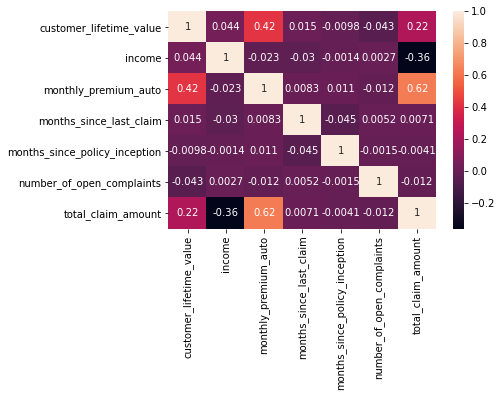

In [192]:
sns.heatmap(data_correlation, annot=True)

<AxesSubplot:xlabel='state', ylabel='total_claim_amount'>

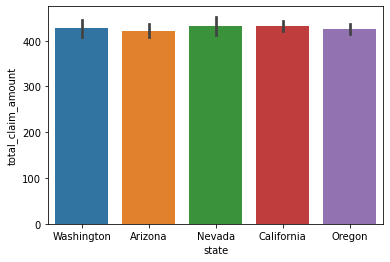

In [193]:
sns.barplot(x = 'state', y = 'total_claim_amount', data = data)

In [194]:
data = data.drop(['state'], axis = 1)

In [202]:
data['number_of_policies'].unique()

array([1, 'other', 2, 3], dtype=object)

In [203]:
def clean_num_policies(x):
    if x in [1,2,3]:
        return str(x)
    else:
        return x

In [204]:
data['number_of_policies'] = list(map(clean_num_policies, data['number_of_policies']))

In [ ]:
# cleaning finished 

In [205]:
y = data['total_claim_amount']
x = data.drop('total_claim_amount', axis = 1)

In [206]:
x.shape

(8767, 20)

In [207]:
len(y)

8767

In [208]:
numericals = x.select_dtypes('number')
categoricals = x.select_dtypes('object')

In [220]:
scaled = StandardScaler().fit_transform(numericals)
scaled = pd.DataFrame(scaled)

In [221]:
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()
encoded = pd.DataFrame(encoded)

In [222]:
type(scaled)

pandas.core.frame.DataFrame

In [223]:
type(encoded)

pandas.core.frame.DataFrame

In [224]:
features = pd.concat([encoded, scaled], axis = 1)

In [225]:
x_train, x_test, y_train, y_test = train_test_split(features , y, test_size=.2 , random_state=100)

In [226]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [227]:
predictions = lm.predict(x_test)

In [228]:
predictions[:5]

array([ 55.85440936, 552.06437987, 930.10869478, 110.53555543,
       459.79866148])

In [229]:
y_test[:5]

6870     123.576765
927      518.400000
2061    1116.000000
8526     148.820742
5716     451.200000
Name: total_claim_amount, dtype: float64

In [ ]:
error = y - y_hat = 100 - 90 = 10

In [230]:

MSE 

RMSE 

MAE

MAD 

R2 - [0, 1]

Adjusted R2 [0,1]

NameError: name 'MSE' is not defined

In [ ]:
Linear Regression RMSE = 100
Decision Trees = RMSE = 96
KNN = 103

In [ ]:
Linear Regression R2 = .84
Decision Trees = R2 = .91
R2 = .88